# DSS 451 Final Project 
### Outline:
### 1. Importing Data
### 2. Data Cleaning 
### 3. Exploratory Data Analysis
### 4. Data Preprocessing 
### 5. Models
#####    -  Logistic Regression 
#####    -  K-Nearest Neighbors
#####    -  Decision Tree
#####   -  Random Forest 
### 6. Conclusion 

## Importing Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SVMSMOTE
from imblearn.combine import SMOTEENN
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [2]:
data=pd.read_csv("healthcare.csv")
data

,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1313919,41,No,Travel_Rarely,1102,Cardiology,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,1200302,49,No,Travel_Frequently,279,Maternity,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,1060315,37,Yes,Travel_Rarely,1373,Maternity,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,1272912,33,No,Travel_Frequently,1392,Maternity,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,1414939,27,No,Travel_Rarely,591,Maternity,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1671,1117656,26,Yes,Travel_Rarely,471,Neurology,24,3,Technical Degree,1,...,2,80,0,1,3,1,1,0,0,0
1672,1152327,46,No,Travel_Rarely,1125,Cardiology,10,3,Marketing,1,...,3,80,1,15,3,3,3,2,1,2
1673,1812428,20,No,Travel_Rarely,959,Maternity,1,3,Life Sciences,1,...,4,80,0,1,0,4,1,0,0,0
1674,1812429,39,No,Travel_Rarely,466,Neurology,1,1,Life Sciences,1,...,3,80,1,21,3,3,21,6,11,8


In [3]:
data.describe()

,EmployeeID,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1.676000e+03,1676.000000,1676.000000,1676.000000,1676.000000,1676.0,1676.000000,1676.000000,1676.000000,1676.000000,...,1676.000000,1676.0,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000
mean,1.456796e+06,36.866348,800.557876,9.221957,2.907518,1.0,2.714797,65.470167,2.724940,2.066826,...,2.718377,80.0,0.806086,11.338902,2.805489,2.766110,7.033413,4.264916,2.200477,4.135442
std,2.487486e+05,9.129126,401.594438,8.158118,1.025835,0.0,1.097534,20.207572,0.714121,1.113423,...,1.078162,0.0,0.855527,7.834996,1.288431,0.702369,6.098991,3.627456,3.229587,3.559662
min,1.025177e+06,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.235832e+06,30.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,1.464606e+06,36.000000,796.500000,7.000000,3.000000,1.0,3.000000,65.500000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1.667992e+06,43.000000,1157.000000,14.000000,4.000000,1.0,4.000000,83.000000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,1.886378e+06,60.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


## Data Cleaning 
deleting duplicate rows 

deleting columns with only 1 value

check for missing values

dropping variables

encoding variables

In [4]:
def remove_dup_rows(df):
    df_row = df.drop_duplicates()
    return df_row
data = remove_dup_rows(data)
data

,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1313919,41,No,Travel_Rarely,1102,Cardiology,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,1200302,49,No,Travel_Frequently,279,Maternity,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,1060315,37,Yes,Travel_Rarely,1373,Maternity,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,1272912,33,No,Travel_Frequently,1392,Maternity,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,1414939,27,No,Travel_Rarely,591,Maternity,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1671,1117656,26,Yes,Travel_Rarely,471,Neurology,24,3,Technical Degree,1,...,2,80,0,1,3,1,1,0,0,0
1672,1152327,46,No,Travel_Rarely,1125,Cardiology,10,3,Marketing,1,...,3,80,1,15,3,3,3,2,1,2
1673,1812428,20,No,Travel_Rarely,959,Maternity,1,3,Life Sciences,1,...,4,80,0,1,0,4,1,0,0,0
1674,1812429,39,No,Travel_Rarely,466,Neurology,1,1,Life Sciences,1,...,3,80,1,21,3,3,21,6,11,8


In [5]:
def function(winedif):
    count = winedif.nunique()
    col_to_remove = count.loc[count.values == 1].index
    wine_rm_co = winedif.drop(col_to_remove, axis = 1)
    return wine_rm_co
data = function(data)
data

,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1313919,41,No,Travel_Rarely,1102,Cardiology,1,2,Life Sciences,2,...,3,1,0,8,0,1,6,4,0,5
1,1200302,49,No,Travel_Frequently,279,Maternity,8,1,Life Sciences,3,...,4,4,1,10,3,3,10,7,1,7
2,1060315,37,Yes,Travel_Rarely,1373,Maternity,2,2,Other,4,...,3,2,0,7,3,3,0,0,0,0
3,1272912,33,No,Travel_Frequently,1392,Maternity,3,4,Life Sciences,4,...,3,3,0,8,3,3,8,7,3,0
4,1414939,27,No,Travel_Rarely,591,Maternity,2,1,Medical,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1671,1117656,26,Yes,Travel_Rarely,471,Neurology,24,3,Technical Degree,3,...,3,2,0,1,3,1,1,0,0,0
1672,1152327,46,No,Travel_Rarely,1125,Cardiology,10,3,Marketing,3,...,3,3,1,15,3,3,3,2,1,2
1673,1812428,20,No,Travel_Rarely,959,Maternity,1,3,Life Sciences,4,...,3,4,0,1,0,4,1,0,0,0
1674,1812429,39,No,Travel_Rarely,466,Neurology,1,1,Life Sciences,4,...,3,3,1,21,3,3,21,6,11,8


In [6]:
data.isnull().sum()

EmployeeID                  0
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
Shift                       0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [7]:
#dropping marital status bc we're looking at attrition through a business perspective and businesses can't do much for marital status
data = data.drop(columns = ['EmployeeID', 'DailyRate', 'HourlyRate', 'MonthlyRate', 'MaritalStatus', 'EducationField', 'RelationshipSatisfaction'])

In [8]:
encoder=OrdinalEncoder()
data["Attrition"]=encoder.fit_transform(data[["Attrition"]])
data["OverTime"]=encoder.fit_transform(data[["OverTime"]])

In [9]:
data

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,...,PercentSalaryHike,PerformanceRating,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,0.0,Travel_Rarely,Cardiology,1,2,2,Female,3,2,...,11,3,0,8,0,1,6,4,0,5
1,49,0.0,Travel_Frequently,Maternity,8,1,3,Male,2,2,...,23,4,1,10,3,3,10,7,1,7
2,37,1.0,Travel_Rarely,Maternity,2,2,4,Male,2,1,...,15,3,0,7,3,3,0,0,0,0
3,33,0.0,Travel_Frequently,Maternity,3,4,4,Female,3,1,...,11,3,0,8,3,3,8,7,3,0
4,27,0.0,Travel_Rarely,Maternity,2,1,1,Male,3,1,...,12,3,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1671,26,1.0,Travel_Rarely,Neurology,24,3,3,Male,1,1,...,18,3,0,1,3,1,1,0,0,0
1672,46,0.0,Travel_Rarely,Cardiology,10,3,3,Female,2,3,...,19,3,1,15,3,3,3,2,1,2
1673,20,0.0,Travel_Rarely,Maternity,1,3,4,Female,2,1,...,13,3,0,1,0,4,1,0,0,0
1674,39,0.0,Travel_Rarely,Neurology,1,1,4,Female,2,4,...,16,3,1,21,3,3,21,6,11,8


## Exploratory Data Analysis
histograms 

correlation matrix 

dropping variables based on correlations 

In [31]:
fig = px.histogram(data,x="Gender",color="Attrition",barmode="group",text_auto=".2f", template = 'seaborn',
             title = "Attrition by Gender")
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [13]:
fig = px.histogram(data,x="Department",color="Attrition",barmode="group",text_auto=".2f", template = 'seaborn',
             title = "Attrition by Department")
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [14]:
fig = px.histogram(data,x="JobRole",color="Attrition",barmode="group",text_auto=".2f", template = 'seaborn',
             title = "Attrition by Job Role")
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [15]:
fig = px.histogram(data,x="OverTime",color="Attrition",barmode="group",text_auto=".2f", template = 'seaborn',
             title = "Attrition by Overtime")
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [16]:
fig = px.histogram(data,x="BusinessTravel",color="Attrition",barmode="group",text_auto=".2f", template = 'seaborn',
             title = "Attrition by Business Travel")
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

<AxesSubplot:>

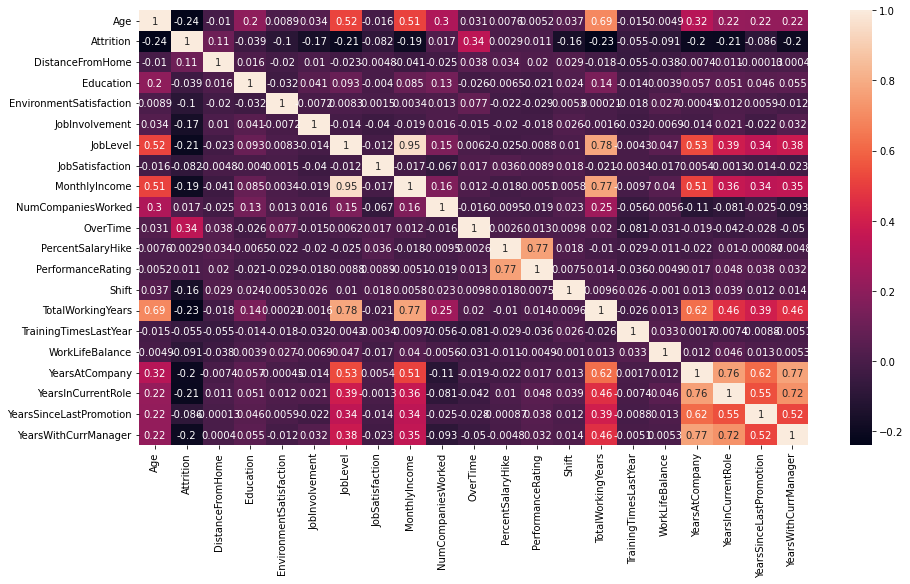

In [19]:
plt.figure(figsize = (15,8))
sns.heatmap(data.corr(), annot=True)

Based on the correlation matrix above, monthly income is highly correlated with job level. Total working years is correlated with job level and monthly income. Performance rating is correlated with job salary hike. Years in current role is correlated with years at company and years with current manager. Years at company is correlated with years with current manager. 

Because of these correlations, I am choosing to drop: monthly income (this is also skewed so it's good to drop), total working years, job salary hike, years with current manager. 

<AxesSubplot:>

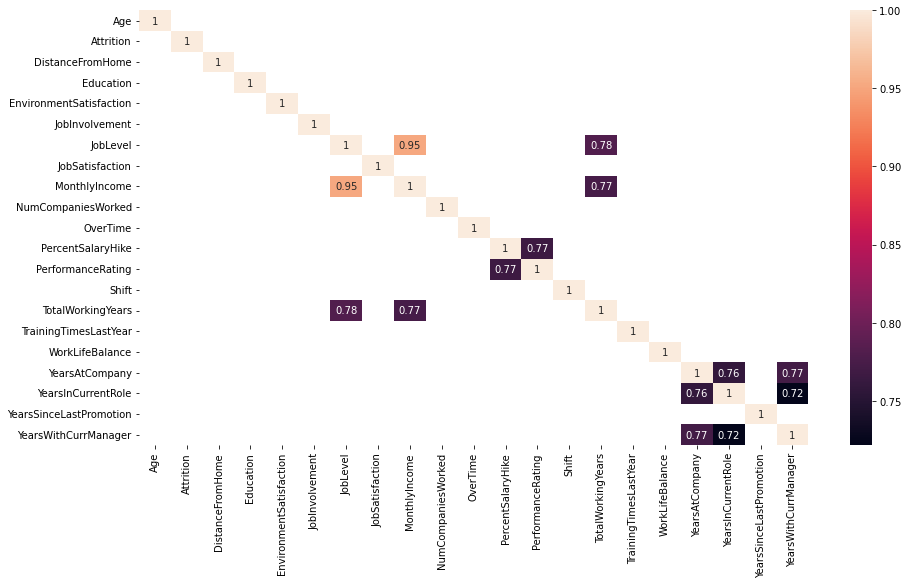

In [21]:
plt.figure(figsize = (15,8))
sns.heatmap(data.corr(), mask = data.corr() < 0.7, annot=True)

<AxesSubplot:>

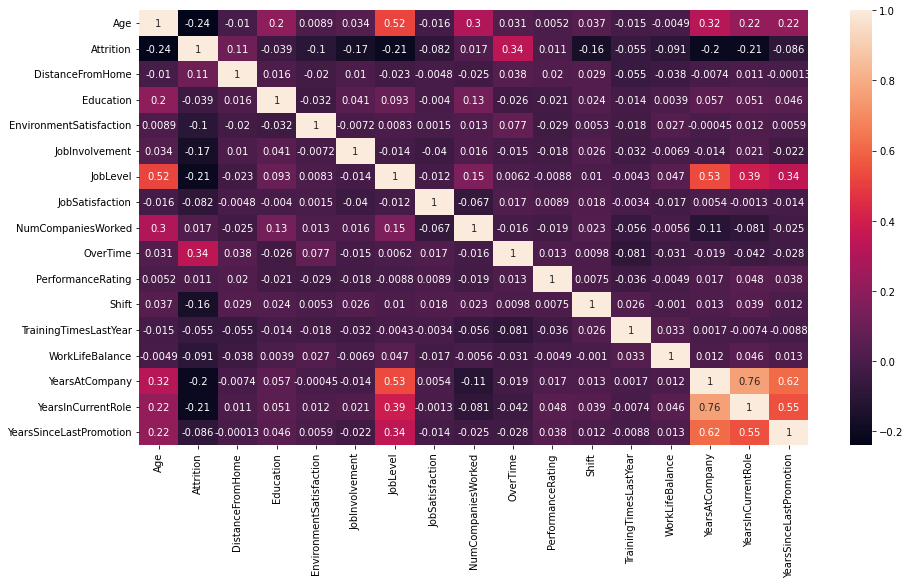

In [22]:
datanew = data.drop(columns = ['MonthlyIncome', 'PercentSalaryHike', 'TotalWorkingYears', 'YearsWithCurrManager'])
plt.figure(figsize = (15,8))
sns.heatmap(datanew.corr(), annot=True)

Years in current role is still highly correlated with years at company so I will drop years in current role. I decided this because a lot of our observations are nurses and typically nurses stay in the same role (aka nurse). 

In [23]:
datanew = datanew.drop(columns = ['YearsInCurrentRole'], axis = 1)
datanew

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,NumCompaniesWorked,OverTime,PerformanceRating,Shift,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion
0,41,0.0,Travel_Rarely,Cardiology,1,2,2,Female,3,2,Nurse,4,8,1.0,3,0,0,1,6,0
1,49,0.0,Travel_Frequently,Maternity,8,1,3,Male,2,2,Other,2,1,0.0,4,1,3,3,10,1
2,37,1.0,Travel_Rarely,Maternity,2,2,4,Male,2,1,Nurse,3,6,1.0,3,0,3,3,0,0
3,33,0.0,Travel_Frequently,Maternity,3,4,4,Female,3,1,Other,3,1,1.0,3,0,3,3,8,3
4,27,0.0,Travel_Rarely,Maternity,2,1,1,Male,3,1,Nurse,2,9,0.0,3,1,3,3,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1671,26,1.0,Travel_Rarely,Neurology,24,3,3,Male,1,1,Nurse,4,1,1.0,3,0,3,1,1,0
1672,46,0.0,Travel_Rarely,Cardiology,10,3,3,Female,2,3,Nurse,4,2,1.0,3,1,3,3,3,1
1673,20,0.0,Travel_Rarely,Maternity,1,3,4,Female,2,1,Other,2,1,0.0,3,0,0,4,1,0
1674,39,0.0,Travel_Rarely,Neurology,1,1,4,Female,2,4,Therapist,4,1,0.0,3,1,3,3,21,11


## Data Preprocessing

one hot encoding

z-score standardization

In [24]:
dummy_travel = pd.get_dummies(datanew['BusinessTravel'], prefix = 'Travel')
#dummy_travel
dummy_dept = pd.get_dummies(datanew['Department'], prefix = 'Dept')
#dummy_dept
dummy_gender = pd.get_dummies(datanew['Gender'], prefix = 'Gender')
dummy_gender = dummy_gender.drop(columns = ['Gender_Female'], axis = 1)
dummy_gender = dummy_gender.rename(columns = {'Gender_Male':'Male'})
#dummy_gender
data_encoded = pd.concat([datanew, dummy_travel, dummy_dept, dummy_gender], axis =1)
data_encoded = data_encoded.select_dtypes(include = [np.number])
data_encoded

,Age,Attrition,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,NumCompaniesWorked,OverTime,...,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion,Travel_Non-Travel,Travel_Travel_Frequently,Travel_Travel_Rarely,Dept_Cardiology,Dept_Maternity,Dept_Neurology,Male
0,41,0.0,1,2,2,3,2,4,8,1.0,...,1,6,0,0,0,1,1,0,0,0
1,49,0.0,8,1,3,2,2,2,1,0.0,...,3,10,1,0,1,0,0,1,0,1
2,37,1.0,2,2,4,2,1,3,6,1.0,...,3,0,0,0,0,1,0,1,0,1
3,33,0.0,3,4,4,3,1,3,1,1.0,...,3,8,3,0,1,0,0,1,0,0
4,27,0.0,2,1,1,3,1,2,9,0.0,...,3,2,2,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1671,26,1.0,24,3,3,1,1,4,1,1.0,...,1,1,0,0,0,1,0,0,1,1
1672,46,0.0,10,3,3,2,3,4,2,1.0,...,3,3,1,0,0,1,1,0,0,0
1673,20,0.0,1,3,4,2,1,2,1,0.0,...,4,1,0,0,0,1,0,1,0,0
1674,39,0.0,1,1,4,2,4,4,1,0.0,...,3,21,11,0,0,1,0,0,1,0


In [25]:
X = data_encoded.drop("Attrition", axis = 1)
y =  data_encoded["Attrition"]
data_array = X.values
z_score = StandardScaler()
data_z = z_score.fit_transform(data_array)
data_array
data_z

array([[ 0.45293334, -1.00812605, -0.88492667, ..., -0.95107595,
        -0.51283452, -1.21325035],
       [ 1.32951102, -0.14982889, -1.86003324, ...,  1.05144074,
        -0.51283452,  0.8242322 ],
       [ 0.0146445 , -0.88551217, -0.88492667, ...,  1.05144074,
        -0.51283452,  0.8242322 ],
       ...,
       [-1.84808308, -1.00812605,  0.0901799 , ...,  1.05144074,
        -0.51283452, -1.21325035],
       [ 0.23378892, -1.00812605, -1.86003324, ..., -0.95107595,
         1.94994673, -1.21325035],
       [-1.08107761, -0.88551217, -0.88492667, ..., -0.95107595,
        -0.51283452, -1.21325035]])

In [26]:
col = X.columns
X_standard = pd.DataFrame(data_z,columns=col)
X_standard

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,NumCompaniesWorked,OverTime,PerformanceRating,...,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion,Travel_Non-Travel,Travel_Travel_Frequently,Travel_Travel_Rarely,Dept_Cardiology,Dept_Maternity,Dept_Neurology,Male
0,0.452933,-1.008126,-0.884927,-0.651470,0.385287,-0.060036,1.142851,2.154939,1.587768,-0.420674,...,-2.515254,-0.169491,-0.681553,-0.338174,-0.485786,0.644624,1.468438,-0.951076,-0.512835,-1.213250
1,1.329511,-0.149829,-1.860033,0.259935,-1.015454,-0.060036,-0.669276,-0.671100,-0.629815,2.377140,...,0.333101,0.486551,-0.371823,-0.338174,2.058519,-1.551291,-0.680996,1.051441,-0.512835,0.824232
2,0.014644,-0.885512,-0.884927,1.171341,-1.015454,-0.958436,0.236787,1.347499,1.587768,-0.420674,...,0.333101,-1.153553,-0.681553,-0.338174,-0.485786,0.644624,-0.680996,1.051441,-0.512835,0.824232
3,-0.423644,-0.762898,1.065286,1.171341,0.385287,-0.958436,0.236787,-0.671100,1.587768,-0.420674,...,0.333101,0.158530,0.247636,-0.338174,2.058519,-1.551291,-0.680996,1.051441,-0.512835,-1.213250
4,-1.081078,-0.885512,-1.860033,-1.562875,0.385287,-0.958436,-0.669276,2.558659,-0.629815,-0.420674,...,0.333101,-0.825533,-0.062094,-0.338174,-0.485786,0.644624,-0.680996,1.051441,-0.512835,0.824232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1671,-1.190650,1.811993,0.090180,0.259935,-2.416195,-0.958436,1.142851,-0.671100,1.587768,-0.420674,...,-2.515254,-0.989543,-0.681553,-0.338174,-0.485786,0.644624,-0.680996,-0.951076,1.949947,0.824232
1672,1.000794,0.095399,0.090180,0.259935,-1.015454,0.838363,1.142851,-0.267380,1.587768,-0.420674,...,0.333101,-0.661522,-0.371823,-0.338174,-0.485786,0.644624,1.468438,-0.951076,-0.512835,-1.213250
1673,-1.848083,-1.008126,0.090180,1.171341,-1.015454,-0.958436,-0.669276,-0.671100,-0.629815,-0.420674,...,1.757279,-0.989543,-0.681553,-0.338174,-0.485786,0.644624,-0.680996,1.051441,-0.512835,-1.213250
1674,0.233789,-1.008126,-1.860033,1.171341,-1.015454,1.736762,1.142851,-0.671100,-0.629815,-0.420674,...,0.333101,2.290667,2.725472,-0.338174,-0.485786,0.644624,-0.680996,-0.951076,1.949947,-1.213250


## Models

## Logistic Regression with Z score standardized data

Originally, I did logistic regression without the standardized data, but the standardized data yielded better results so I discarded the original model. I also tried different values of k for the folds, and 10 had the best results.

In [30]:
lr = LogisticRegression(max_iter = 100, solver = 'liblinear')

In [31]:
y =  data_encoded["Attrition"]
y = y.values
X = X_standard.values

In [32]:
kf = StratifiedKFold(n_splits = 10)

/Users/marisapassarella/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



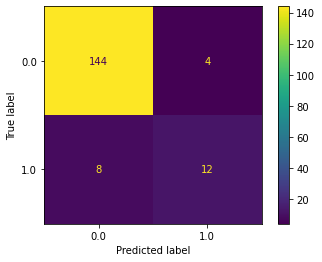

/Users/marisapassarella/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.



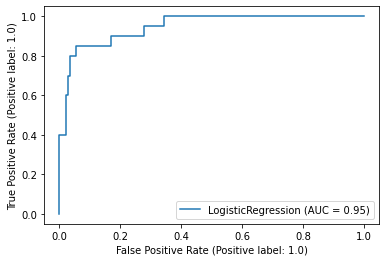

/Users/marisapassarella/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



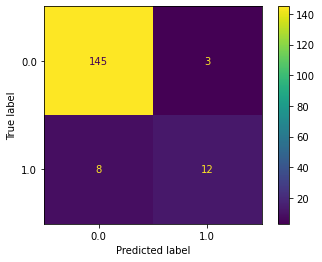

/Users/marisapassarella/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.



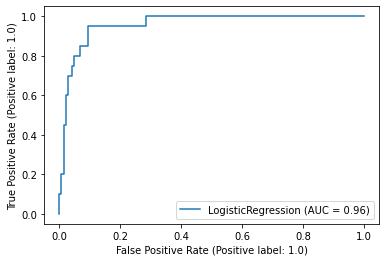

/Users/marisapassarella/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



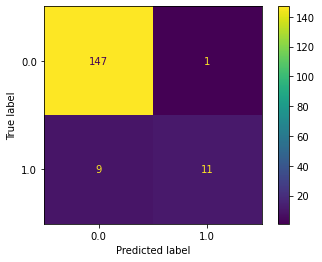

/Users/marisapassarella/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.



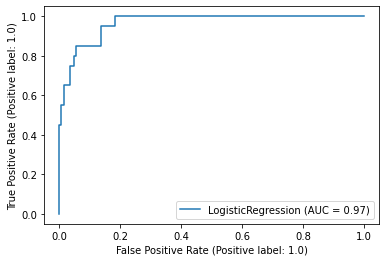

/Users/marisapassarella/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



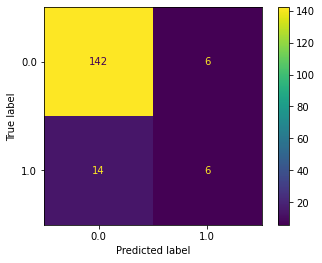

/Users/marisapassarella/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.



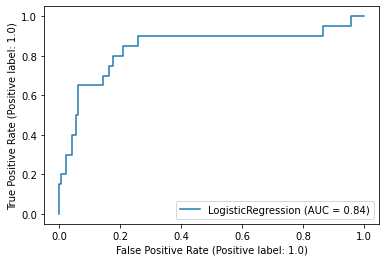

/Users/marisapassarella/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



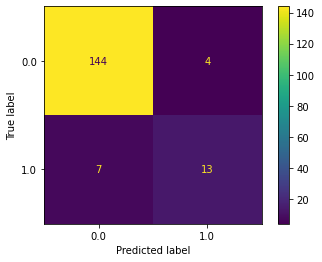

/Users/marisapassarella/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.



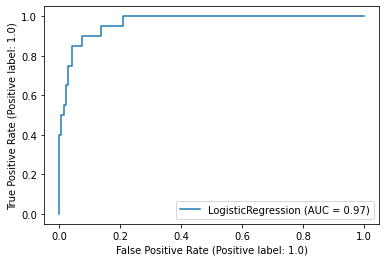

/Users/marisapassarella/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



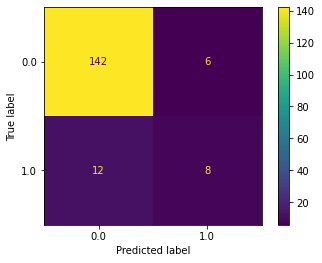

/Users/marisapassarella/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.



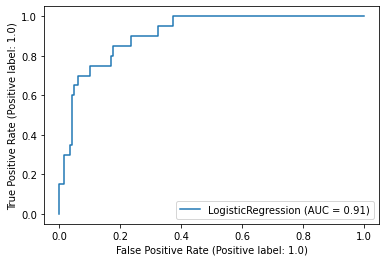

/Users/marisapassarella/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



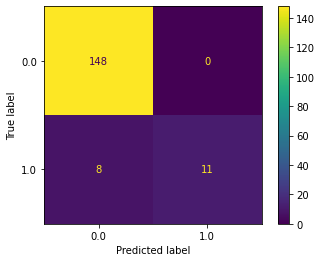

/Users/marisapassarella/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.



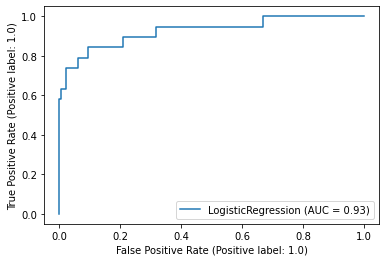

/Users/marisapassarella/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



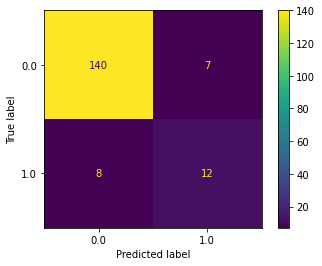

/Users/marisapassarella/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.



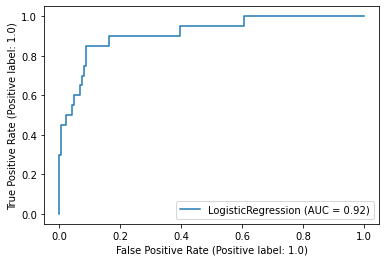

/Users/marisapassarella/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



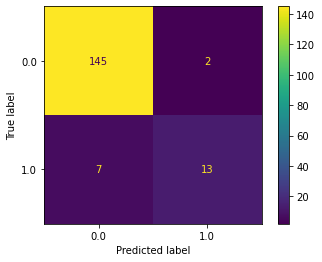

/Users/marisapassarella/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.



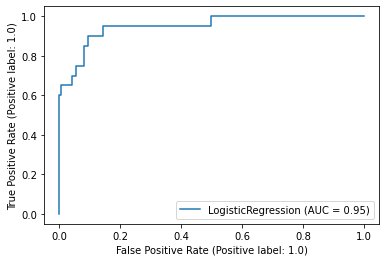

/Users/marisapassarella/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



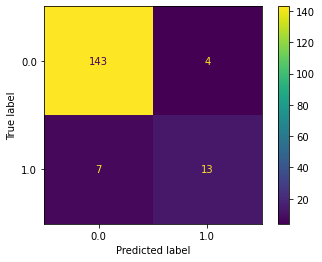

/Users/marisapassarella/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.



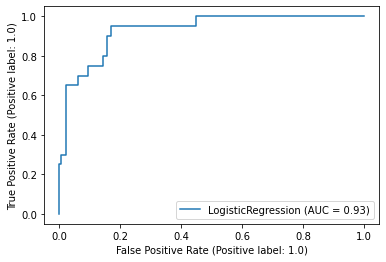

In [33]:
acc_all = []
precision_all = []
recall_all = []
f1_all = []
roc_all = []
for train_index, test_index in kf.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model = lr.fit(X_train, y_train)
    pred = model.predict(X_test)
    
    acc = accuracy_score(pred, y_test)
    precision = precision_score(pred, y_test)
    recall = recall_score(pred, y_test)
    f1 = f1_score(pred, y_test)
    roc = roc_auc_score(pred, y_test)
    
    acc_all.append(acc)
    precision_all.append(precision)
    recall_all.append(recall)
    f1_all.append(f1)
    roc_all.append(roc)
    
    plot_confusion_matrix(model, X_test, y_test)
    plt.show()
    
    plot_roc_curve(model, X_test, y_test)
    plt.show()

In [34]:
#average accuracy
print(sum(acc_all)/len(acc_all))
#average recall
print(sum(recall_all)/len(recall_all))
#average precision
print(sum(precision_all)/len(precision_all))
#average f1
print(sum(f1_all)/len(f1_all))
#average roc 
print(sum(roc_all)/len(roc_all))

0.9254419731964644
0.7565752616836208
0.5578947368421053
0.6382449684655567
0.849553123067788


In [36]:
odds_ratio = np.exp(lr.coef_)
model_interpretation = pd.DataFrame(odds_ratio, columns = col).T.sort_values(by = 0)
model_interpretation

,0
YearsAtCompany,0.279190
Age,0.382414
Shift,0.426102
JobLevel,0.433325
JobInvolvement,0.516569
EnvironmentSatisfaction,0.569683
JobSatisfaction,0.594026
WorkLifeBalance,0.620479
TrainingTimesLastYear,0.763358
Travel_Non-Travel,0.854475


The above table shows the odds ratio sorted by least to greatest. You can see the top 5 variables that are less than 1 and greater than 1. Out of all the variables overtime had the most impact on attrition. 

## KNN 

KNN is a distance based algorithm so we must use the standardized data.

Must find best k first.

I orginally tried KNN without under/over sampling but it did not have good results and then stopped working. I decided to just get rid of this and keep the KNN with under/over sampling. 

In [37]:
y =  data_encoded["Attrition"]
y = y.values
X = X_standard.values

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 1)

Text(0, 0.5, 'Error Rate')

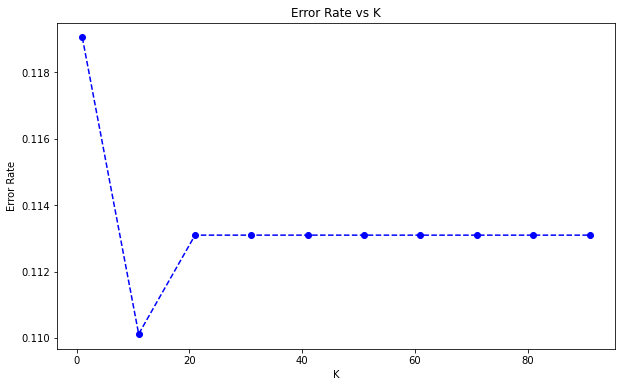

In [46]:
# for k from 1 to 400 counting by 10 
error_rate=[]
for k in range(1, 100, 10):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    error = np.mean(pred!= y_test)
    error_rate.append(error)
plt.figure(figsize = (10,6)) #figure size can be anything you want 
plt.plot(range(1,100,10), error_rate, color = 'blue', linestyle = 'dashed', marker = 'o')
plt.title('Error Rate vs K')
plt.xlabel('K')
plt.ylabel('Error Rate')

Text(0, 0.5, 'Error Rate')

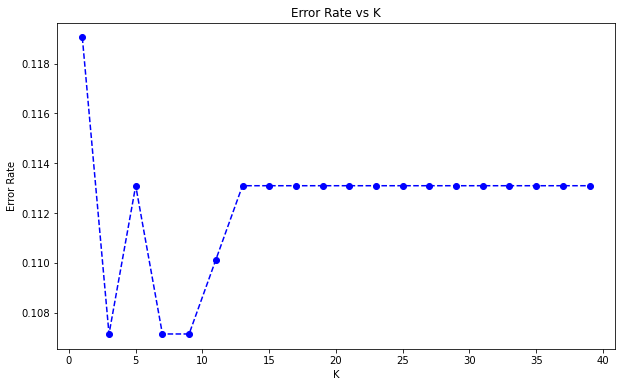

In [47]:
#narrow the range of k 
error_rate=[]
for k in range(1, 40, 2):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    error = np.mean(pred!= y_test)
    error_rate.append(error)
plt.figure(figsize = (10,6)) #figure size can be anything you want 
plt.plot(range(1, 40, 2), error_rate, color = 'blue', linestyle = 'dashed', marker = 'o')
plt.title('Error Rate vs K')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [52]:
kf = StratifiedKFold(n_splits = 10)
knn = KNeighborsClassifier(n_neighbors = 9)

In [53]:
acc_all=[]
precision_all=[]
recall_all=[]
f1_all=[]
roc_all=[]
for train_index,test_index in kf.split(X,y):
    X_train,X_test=X[train_index],X[test_index]
    y_train,y_test=y[train_index],y[test_index]
    sme=SMOTEENN()
    res_train_X,res_train_y=sme.fit_resample(X_train,y_train)
    model=knn.fit(res_train_X,res_train_y)
    pred=model.predict(X_test)

    acc=accuracy_score(pred,y_test)
    precision=precision_score(pred,y_test)
    recall=recall_score(pred,y_test)
    f1=f1_score(pred,y_test)
    roc=roc_auc_score(pred,y_test)

    acc_all.append(acc)
    precision_all.append(precision)
    recall_all.append(recall)
    f1_all.append(f1)
    roc_all.append(roc)

In [54]:
#average accuracy
print(sum(acc_all)/len(acc_all))
#average recall
print(sum(recall_all)/len(recall_all))
#average precision
print(sum(precision_all)/len(precision_all))
#average f1
print(sum(f1_all)/len(f1_all))
#average roc 
print(sum(roc_all)/len(roc_all))

0.7291310236669518
0.28870689491595847
0.8289473684210525
0.4260370228178861
0.6287154342529437


## Decision Tree 

First, I ran a regular decision tree. Then I did pre-pruning which yielded better results.

In [58]:
kf=StratifiedKFold(n_splits=10)
decision_tree = tree.DecisionTreeClassifier()

In [59]:
acc_all = []
precision_all = []
recall_all = []
f1_all = []
roc_all = []
for train_index, test_index in kf.split(X,y):
    X_train, X_test = X[train_index],X[test_index]
    y_train, y_test = y[train_index],y[test_index]
    model = decision_tree.fit(X_train, y_train)
    pred = model.predict(X_test)
    
    acc = accuracy_score(pred, y_test)
    precision = precision_score(pred, y_test)
    recall=recall_score(pred,y_test)
    f1=f1_score(pred,y_test)
    roc=roc_auc_score(pred,y_test)
    
    acc_all.append(acc)
    precision_all.append(precision)
    recall_all.append(recall)
    f1_all.append(f1)
    roc_all.append(roc)

In [60]:
print(sum(acc_all)/len(acc_all))
print(sum(recall_all)/len(recall_all))
print(sum(precision_all)/len(precision_all))
print(sum(f1_all)/len(f1_all))
print(sum(roc_all)/len(roc_all))

0.8866089250071285
0.5345146380443863
0.5118421052631579
0.5129778914708114
0.7346853790824447


Pre-pruning

In [61]:
grid_param={'criterion':['gini','entropy','log_loss'],
            'splitter':['best','random'],
            'max_depth':range(2,20,2),
            'min_samples_leaf':range(1,15,2),
            'min_samples_split':range(2,20,2)            
            }

In [82]:
grid_search=GridSearchCV(estimator=model,param_grid=grid_param,cv=10,n_jobs=-1)

In [83]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(criterion='log_loss',
                                              max_depth=16, min_samples_leaf=9,
                                              min_samples_split=18,
                                              splitter='random'),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': range(2, 20, 2),
                         'min_samples_leaf': range(1, 15, 2),
                         'min_samples_split': range(2, 20, 2),
                         'splitter': ['best', 'random']})

In [84]:
grid_search.best_params_

{'criterion': 'log_loss',
 'max_depth': 16,
 'min_samples_leaf': 13,
 'min_samples_split': 10,
 'splitter': 'random'}

In [85]:
best_decision_tree = tree.DecisionTreeClassifier(criterion='log_loss',max_depth=16,min_samples_leaf=13,min_samples_split=10,splitter='random')

In [86]:
acc_all=[]
precision_all=[]
recall_all=[]
f1_all=[]
roc_all=[]
for train_index,test_index in kf.split(X,y):
  X_train,X_test=X[train_index],X[test_index]
  y_train,y_test=y[train_index],y[test_index]
  model=best_decision_tree.fit(X_train,y_train)
  pred=model.predict(X_test)

  acc=accuracy_score(pred,y_test)
  precision=precision_score(pred,y_test)
  recall=recall_score(pred,y_test)
  f1=f1_score(pred,y_test)
  roc=roc_auc_score(pred,y_test)

  acc_all.append(acc)
  precision_all.append(precision)
  recall_all.append(recall)
  f1_all.append(f1)
  roc_all.append(roc)

In [87]:
print(sum(acc_all)/len(acc_all))
print(sum(recall_all)/len(recall_all))
print(sum(precision_all)/len(precision_all))
print(sum(f1_all)/len(f1_all))
print(sum(roc_all)/len(roc_all))

0.9057278300541775
0.6452983291218586
0.45631578947368423
0.5255446470776886
0.7876232478650751


[Text(0.5778688524590164, 0.9444444444444444, 'OverTime <= 1.036\nlog_loss = 0.525\nsamples = 1509\nvalue = [1330, 179]\nclass = Stay'),
 Text(0.3401639344262295, 0.8333333333333334, 'Shift <= -0.534\nlog_loss = 0.296\nsamples = 1088\nvalue = [1031, 57]\nclass = Stay'),
 Text(0.18032786885245902, 0.7222222222222222, 'Age <= -0.854\nlog_loss = 0.473\nsamples = 454\nvalue = [408, 46]\nclass = Stay'),
 Text(0.08196721311475409, 0.6111111111111112, 'YearsAtCompany <= -0.672\nlog_loss = 0.793\nsamples = 113\nvalue = [86, 27]\nclass = Stay'),
 Text(0.03278688524590164, 0.5, 'TrainingTimesLastYear <= -0.11\nlog_loss = 1.0\nsamples = 47\nvalue = [24, 23]\nclass = Stay'),
 Text(0.01639344262295082, 0.3888888888888889, 'log_loss = 0.918\nsamples = 15\nvalue = [5, 10]\nclass = Left'),
 Text(0.04918032786885246, 0.3888888888888889, 'YearsAtCompany <= -0.971\nlog_loss = 0.974\nsamples = 32\nvalue = [19, 13]\nclass = Stay'),
 Text(0.03278688524590164, 0.2777777777777778, 'log_loss = 0.998\nsamples =

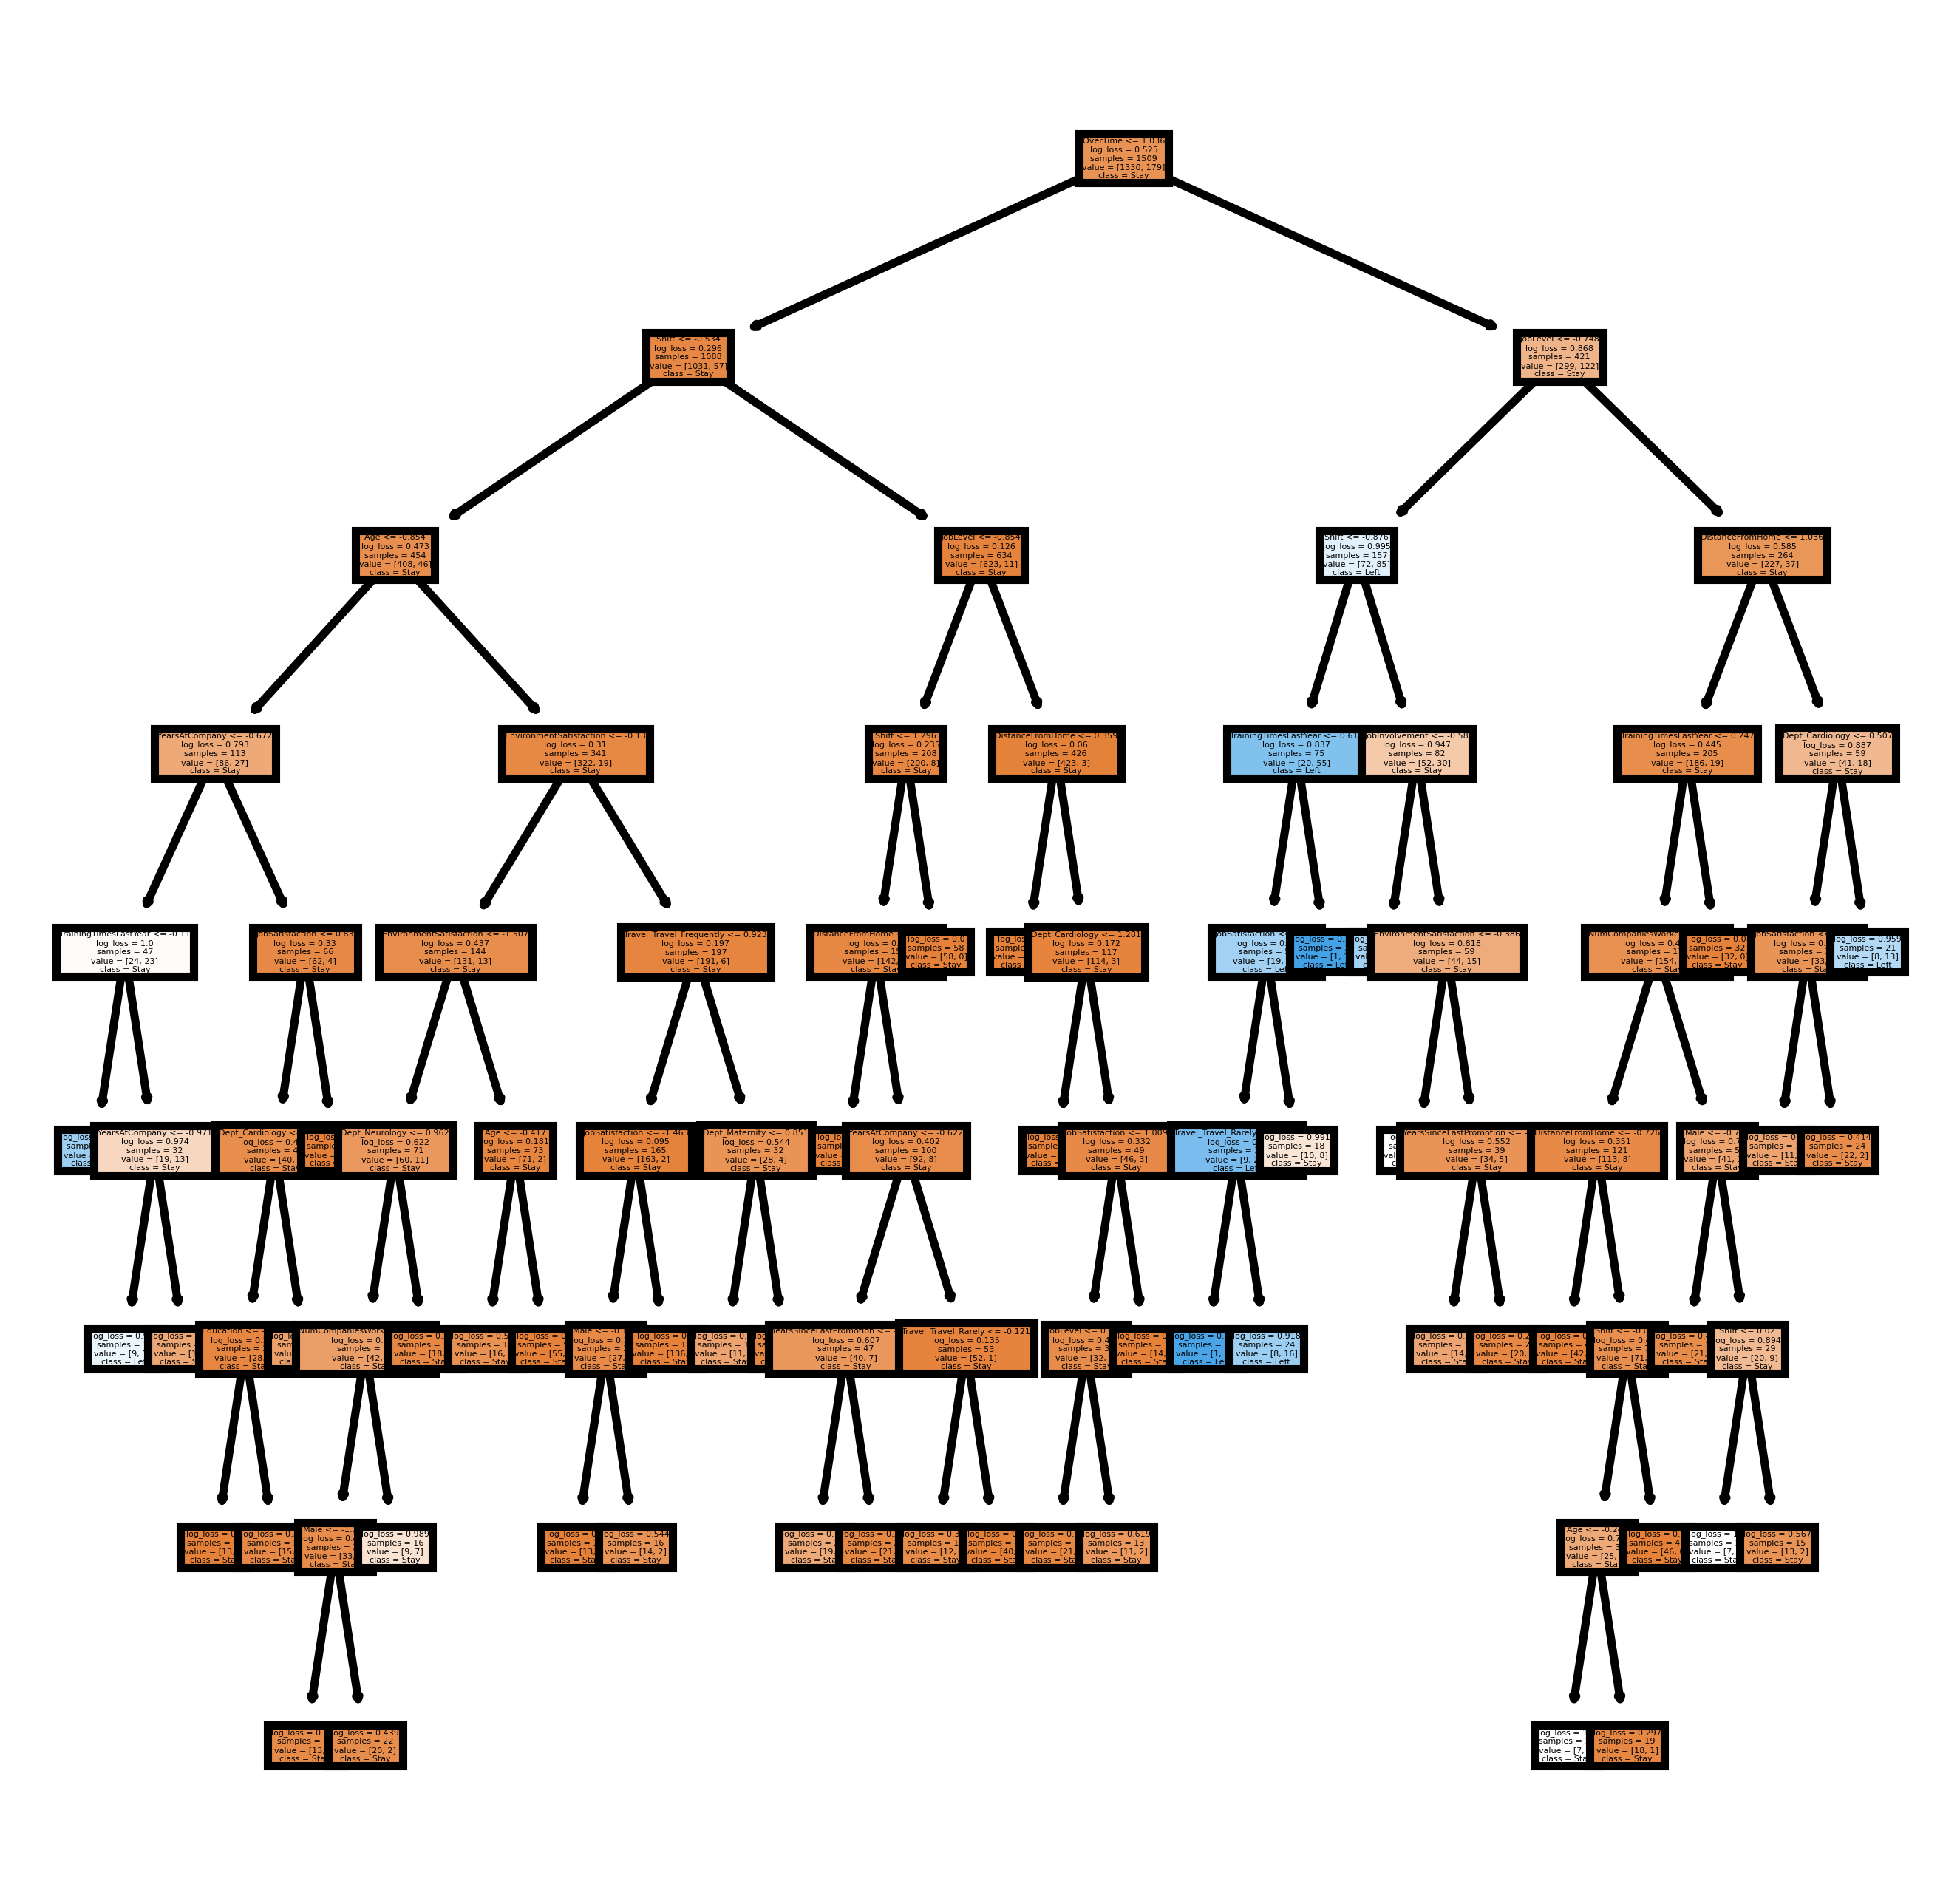

In [88]:
fn = col
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(4,4),dpi=800)
tree.plot_tree(model,feature_names=fn,class_names=['Stay','Left'],filled=True)

In [89]:
importance = model.feature_importances_
importance_table=pd.DataFrame(importance,fn,columns=['Importance Value'])
importance_table.sort_values(by='Importance Value', ascending=False)

,Importance Value
OverTime,0.252386
Shift,0.148873
JobLevel,0.147816
Age,0.073038
YearsAtCompany,0.066326
DistanceFromHome,0.063427
Dept_Cardiology,0.040901
EnvironmentSatisfaction,0.039450
JobSatisfaction,0.032944
TrainingTimesLastYear,0.030883


The above results are fairly similar to that of the logistic regression in which overtime is the most important factor contributing to attrition. 

## Random Forest 

In [90]:
random_forest = RandomForestClassifier()

In [91]:
acc_all=[]
precision_all=[]
recall_all=[]
f1_all=[]
roc_all=[]
for train_index,test_index in kf.split(X,y):
  X_train,X_test=X[train_index],X[test_index]
  y_train,y_test=y[train_index],y[test_index]
  model=random_forest.fit(X_train,y_train)
  pred=model.predict(X_test)

  acc=accuracy_score(pred,y_test)
  precision=precision_score(pred,y_test)
  recall=recall_score(pred,y_test)
  f1=f1_score(pred,y_test)
  roc=roc_auc_score(pred,y_test)

  acc_all.append(acc)
  precision_all.append(precision)
  recall_all.append(recall)
  f1_all.append(f1)
  roc_all.append(roc)

In [92]:
print(sum(acc_all)/len(acc_all))
print(sum(recall_all)/len(recall_all))
print(sum(precision_all)/len(precision_all))
print(sum(f1_all)/len(f1_all))
print(sum(roc_all)/len(roc_all))

0.9182599087539207
0.8301250186595015
0.42631578947368415
0.5354995119131859
0.8791238930287072


In [96]:
importance = model.feature_importances_
importance_table=pd.DataFrame(importance,fn,columns=['Importance Value']).sort_values(by='Importance Value', ascending = False)
importance_table

,Importance Value
Age,0.144823
OverTime,0.110133
YearsAtCompany,0.093343
DistanceFromHome,0.077572
JobLevel,0.060966
NumCompaniesWorked,0.057032
JobInvolvement,0.051616
Shift,0.047585
EnvironmentSatisfaction,0.047110
WorkLifeBalance,0.044522


Again, this model is similar to the others is which overtime plays an important role. 

## Conclusion

After running the four algorithms, logistic regression produced the best model with the highest accuracy and f1 score. The variables that were most important based on odds ratio were overtime, years at company, age, distance from home, and years since last promotion.